In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pymannkendall as mk
from statsmodels.graphics.tsaplots import plot_acf

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rainfall_data = pd.read_excel('india___monthly_rainfall_data___1901_to_2002.xlsx')

# 1. Rainfall Data Analysis for Srikakulam District Andhra Pradesh

In [3]:
df = rainfall_data.loc[(rainfall_data['State']== 'Andhra Pradesh') & (rainfall_data['District']=='Srikakulam')].reset_index().drop(['index', 'vlookup'], axis=1)

## 1.1 Yearly Rainfall Analysis 

In [4]:
columns_to_sum = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [5]:
df.loc[:, 'yearly_rainfall'] = df[columns_to_sum].sum(axis=1)

In [6]:
df.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,yearly_rainfall
0,Andhra Pradesh,Srikakulam,1901.0,41.729,22.540,2.883,5.542,69.155,53.436,79.980,72.136,202.187,126.637,280.159,0.950,957.334
1,Andhra Pradesh,Srikakulam,1902.0,6.231,0.025,1.230,10.122,46.258,96.080,130.709,209.028,161.785,100.428,8.530,28.396,798.822
2,Andhra Pradesh,Srikakulam,1903.0,1.295,7.861,0.650,2.282,15.254,134.933,284.154,99.159,173.063,116.758,71.856,9.692,916.957
3,Andhra Pradesh,Srikakulam,1904.0,0.383,0.461,2.378,0.858,106.056,97.314,127.274,225.318,186.265,159.421,0.683,12.428,918.839
4,Andhra Pradesh,Srikakulam,1905.0,1.151,29.107,26.146,122.885,132.909,57.393,139.559,176.908,307.734,39.765,2.864,0.045,1036.466


Text(0.5, 0.98, 'Yearly Rainfall in Srikakulam (A.P.) (1901-2002)')

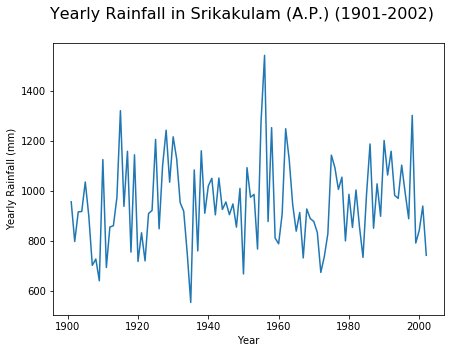

In [7]:
fig1 = plt.figure(figsize=[7,5])
ax = plt.axes()
x = df['Year'].to_list()
y = df['yearly_rainfall'].to_list()
plt.xlabel("Year")
plt.ylabel("Yearly Rainfall (mm)")
ax.plot(x, y)
fig1.suptitle('Yearly Rainfall in Srikakulam (A.P.) (1901-2002)', fontsize=16)

As we can see from the above plot the rainfall data for Srikakulam district is very random. There is no clear treand or pattern visible at one glance.

### 1.1.1 Autocorrelation Test

In [8]:
data = np.array(df['yearly_rainfall'])

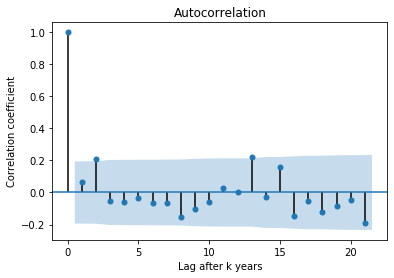

In [9]:
plot_acf(data)
plt.xlabel("Lag after k years")
plt.ylabel("Correlation coefficient")
plt.show()

As we can see in the above auto-correlation plot, there is no significant correlation between rainfall in consecutive years.

### 1.1.2 Mann-Kendall Test

In [10]:
result = mk.original_test(data)

In [11]:
result

Mann_Kendall_Test(trend='no trend', h=False, p=0.4627014990114473, z=0.73440572437457, Tau=0.04950495049504951, s=255.0, var_s=119617.66666666667, slope=0.4187500000000049, intercept=906.5771249999997)

In [12]:
z = result.z
z

0.73440572437457

In [13]:
trend = result.trend
trend

'no trend'

### 1.1.3 Sen's Slope

In [14]:
sen_slope_mk_test = result.slope
sen_slope_mk_test

0.4187500000000049

### 1.1.4 Linear Regression

In [15]:
lin_reg = stats.linregress(x, y)

In [16]:
lin_reg

LinregressResult(slope=0.505122820905734, intercept=-33.83267519361834, rvalue=0.08621057915183136, pvalue=0.38893028765538706, stderr=0.5837360356302442)

In [17]:
slope = lin_reg.slope
intercept = lin_reg.intercept
R_squared = (lin_reg.rvalue)**2

In [18]:
print('Slope :', slope, '\nIntercept :', intercept, '\nR_squared :', R_squared)

Slope : 0.505122820905734 
Intercept : -33.83267519361834 
R_squared : 0.007432263957694181


## 1.2 Monsoon Season Rainfall Data Analysis for Srikakulam (1993-2002)

In [19]:
monsoon_months = ['Jun','Jul', 'Aug', 'Sep']

In [20]:
df['total_rain_in_monsoon'] = df[monsoon_months].sum(axis=1)

Text(0.5, 0.98, 'Rainfall in Monsoon months in Srikakulam (A.P.) (1901-2002)')

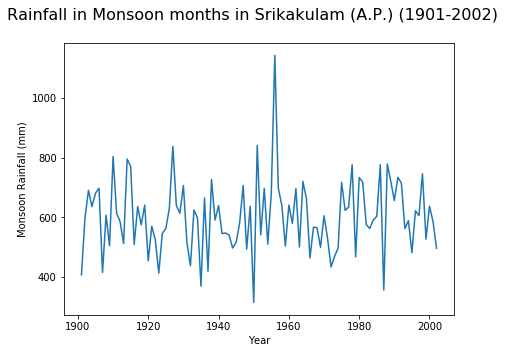

In [21]:
fig1 = plt.figure(figsize=[7,5])
ax = plt.axes()
x1 = df['Year'].to_list()
y1 = df['total_rain_in_monsoon'].to_list()
plt.xlabel("Year")
plt.ylabel("Monsoon Rainfall (mm)")
ax.plot(x1, y1)
fig1.suptitle('Rainfall in Monsoon months in Srikakulam (A.P.) (1901-2002)', fontsize=16)

In [22]:
df_10yrs = df.tail(10)

In [23]:
df_10yrs.head()

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,yearly_rainfall,total_rain_in_monsoon
92,Andhra Pradesh,Srikakulam,1993.0,4.262,0.018,6.019,34.471,48.012,124.547,103.278,149.134,185.809,315.741,11.875,0.010,983.176,562.768
93,Andhra Pradesh,Srikakulam,1994.0,0.355,3.492,18.267,26.927,41.781,62.723,237.334,156.720,132.478,228.748,62.226,0.010,971.061,589.255
94,Andhra Pradesh,Srikakulam,1995.0,18.854,1.412,13.893,18.112,41.059,68.713,163.383,99.467,150.612,449.728,78.775,0.010,1104.018,482.175
95,Andhra Pradesh,Srikakulam,1996.0,1.940,0.961,2.003,37.979,34.273,250.663,63.414,175.686,132.802,256.308,29.970,6.151,992.150,622.565
96,Andhra Pradesh,Srikakulam,1997.0,10.321,2.334,43.171,45.623,6.876,57.118,207.190,144.582,197.365,77.047,81.508,16.559,889.694,606.255


Text(0.5, 0.98, 'Rainfall in Monsoon months in Srikakulam (A.P.) (1993-2002)')

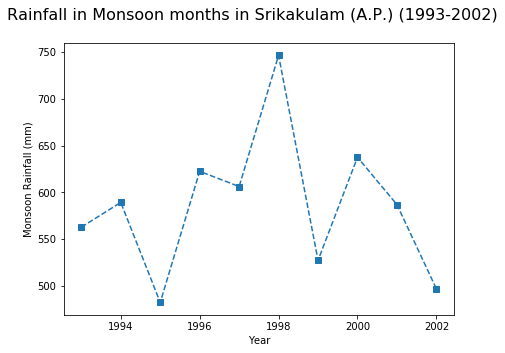

In [24]:
fig1 = plt.figure(figsize=[7,5])
ax = plt.axes()
x2 = df_10yrs['Year'].to_list()
y2 = df_10yrs['total_rain_in_monsoon'].to_list()
plt.xlabel("Year")
plt.ylabel("Monsoon Rainfall (mm)")
plt.plot(x2, y2, linestyle='dashed', marker='s');
fig1.suptitle('Rainfall in Monsoon months in Srikakulam (A.P.) (1993-2002)', fontsize=16)

### 1.2.1 Co-efficient of Variability

In [25]:
CV = (df_10yrs['total_rain_in_monsoon'].std())/(df_10yrs['total_rain_in_monsoon'].mean())

In [26]:
CV

0.1309844978530418